핸즈온 4장 모델 훈련 p.157-184
### **[개념 정리+코드 필사]📝**


# **Chapter4. 모델훈련**

### **4.1 선형회귀**

- 모델훈련: 모델이 훈련 셋이 잘 맞도록 모델 파라미터 설정하는 것
  - 회귀성능 측정지표: 평균 제곱근 오차(RMSE), 모델이 데이터에 잘 들어맞는지 측정
  - RMSE, 즉 비슷하게 MSE(평균제곱오차)를 최소화하는 θ찾아야 함

#### 📘 4.1.1 정규방정식
- 정규방정식✍: 비용함수를 최소화하는 θ 찾는 공식
- 사이킷런의 선형회귀 수행: LinearRegression()
  - scipy.linalg.lstsq() 직접 호출도 가능: 유사역행렬*y로 θ 계산
- 유사역행렬✍: 특잇값 분해(SVD, 표준 행렬 분해기법) 사용해 세개의 행렬 곱셈으로 분해한 후 임곗값보다 작은 모든 수를 0으로, 나머지를 역수로 바꾼 Σ+로 치환해 계산함
  - 유사역행렬 방식이 정규방정식보다 효율적이고 특이 행렬이라도 계산 가능함

#### 📘 4.1.2 계산 복잡도
- (n+1)(n+1) 크기가 되는 역행렬을 계산함. 정규방정식은 계산복잡도가 일반적으로 O($n^{2.4}$)~O($n^{3}$)사이인데 사이킷런의 LinearRegression의 SVD방법은 약 O($n^{2}$)임.
- 두 방법 모두 특성 수가 많아지면 매우 느려지지만 훈련세트의 샘플 수에 대해서는 선형적으로 증가함



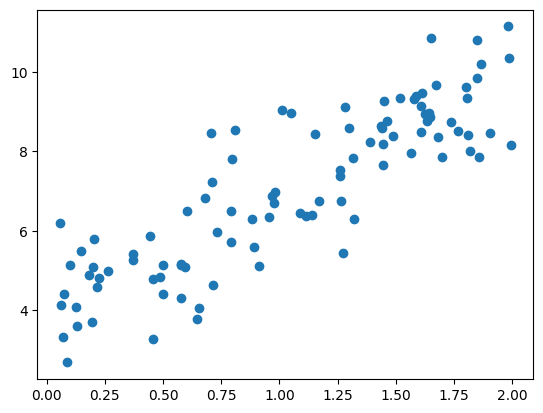

In [ ]:
# 4.1.1 정규방정식

import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.scatter(X,y)

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.91946534],
       [2.97606107]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # x0=1을 추가함
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.91946534],
       [9.87158748]])

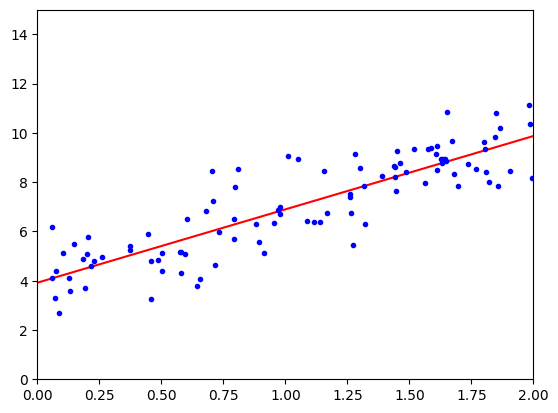

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91946534]), array([[2.97606107]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.91946534],
       [9.87158748]])

In [ ]:
# 직접 호출하는 방법
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.91946534],
       [2.97606107]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.91946534],
       [2.97606107]])

---

### **4.2 경사하강법**

- 특성이 너무 많고 훈련 샘플이 너무 많아 메모리에 담을 수 없을 때 적합
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정함.
  - θ를 임의의 값으로 무작위 초기화 한 후 비용함수가 감소되는 방향으로 조금식 진행해 최솟값에 수렴할 때까지 수행
  - 학습률 파라미터: 스텝의 크기. 비용 함수의 기울기에 비례. 학습률이 너무 작으면 시간이 오래걸리고 너무 크면 발산
  - 문제점:
    1. 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴하는 문제
    1. 특성1과 특성2의 스케일이 다른 훈련 세트 문제
  - 1 > ✅ 선형회귀의 MSE 비용함수는 볼록 함수이므로 경사하강법으로 전역 최솟값에 도달할 수 있음
  - 2 > ✅ 모든 특성 스케일이 갖게 만들어야 함(StandardScaler). 다른 스케일을 가지면 수렴하는데 오랜 시간 걸림
- 모델 훈련 = 비용함수 최소화하는 파라미터 조합 찾기 = 파라미터 공간에서 찾기

#### 📘 4.2.1 배치 경사 하강법

- 편도함수: 각 모델 파라미터 θ가 조금 변할 때 비용함수가 변하는 정도, 즉 비용함수의 그래디언트를 계산. 이때 벡터로 한번에 계산함
  - 매 스텝에서 전체 훈련 데이터 X를 사용함. 큰 훈련세트에서 매우 느리지만 특성 수에 민감하지 않으므로 큰 세트에서 SVD분해,정규방정식보다 빠름
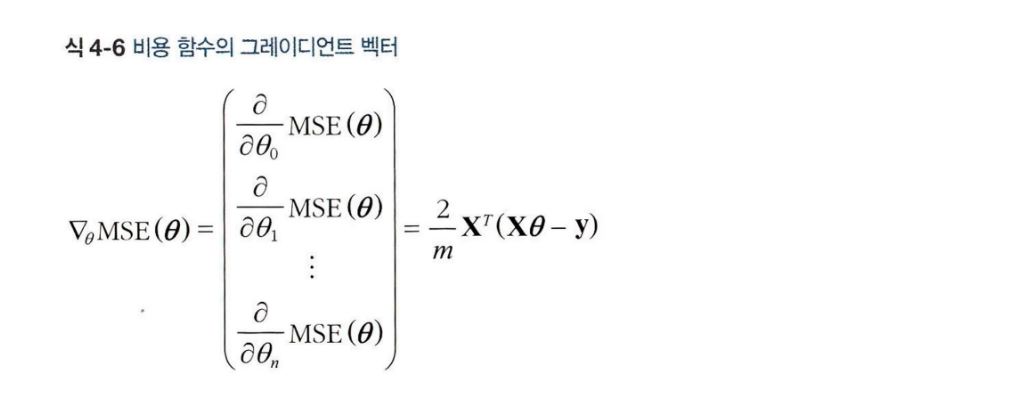

  - 구한 그레이디언트 벡터에 학습률을 곱해 이전 θ에서 빼는 것이 한 스텝.

  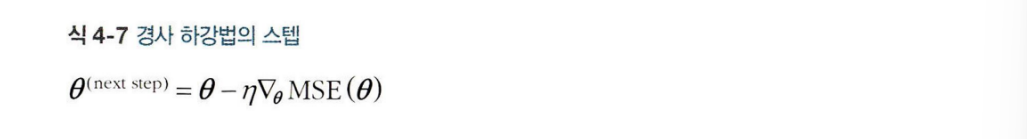

- 학습률: 너무 낮으면 시간이 오래걸리고 학습률이 너무 높으면 스텝이 발산하는 문제 발생.
  - 그리드 탐색: 적절한 학습률을 찾기 위함. 너무 오래걸리지 않도록 반복 횟수를 제한함.
    - 반복횟수: 너무 작으면 최적점 도달 전에 중단되고 너무 크면 시간 낭비됨.
    - 반복 횟수를 크게 지정하고 그레이디언트가 허용오차(𝜀)보다 작아지면 알고리즘 중지해 해결.

#### 📘 4.2.2 확률적 경사 하강법

- 배치 경사하강법은 매 스텝마다 전체 훈련 세트를 사용해, 훈련 세트가 커지면 매우 느려는 문제
- 확률적 경사하강법은 매 스텝에서 한 샘플을 무작위 선택해 그 샘플의 그레이디언트 계산.
  - 반복 시 데이터가 적으므로 알고리즘이 빠르고 매우 큰 훈련 세트 다룰 수 있음
  - 배치 경사 하강법보다 불안정함. 지역 최솟값을 건너뛸수 있는 이점이 있지만 전역 최솟값에 다다르지 못할 수 있음
  - 학습률을 점진적으로 감소시키는 해결방법 -> 시작 시 학습률을 크게 해 빠른 수렴을 하게 하고 작게 줄여서 전역 최솟값에 도달하도록 함.
  - 학습 스케줄: 매 반복에서 학습률을 결정하는 함수
  - 에포크: 훈련 세트 반복 횟수

- 샘플 무작위 선택이므로 에포크마다 모든 샘플 사용하게 하려면 훈련 세트를 섞은 후 하나씩 선택하고 다음 에포크에서 또 섞는 방법을 사용함. 수렴 시간은 늦어짐
- 사이킷런 SGD 방식의 선형 회귀: 📑SGDRegressor(제곱 오차 비용 함수 최적화하는 클래스)

```
SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta=0.1)
- max_iter: 최대 에포크
- tol: 허용오차. 이보다 적게 손실 줄어들 때까지 반복
- eta: 학습률
```

#### 📘 4.2.3 미니배치 경사 하강법
- 각 스텝에서 전체 데이터나 하나의 샘플이 아닌 미니배치(임의의 작은 샘플 세트)에 대해 그레이디언트를 계산함
  - 장점: 행렬 연산에 최적화된 하드웨어(GPU) 사용시 성능 향상
  - 미니 배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하므로 최솟값에 더 가까이 도달함. 지역 최솟값 문제에는 취약함(미니배치, 확률적). 따라서 적절한 학습 스케줄을 사용해야 함.


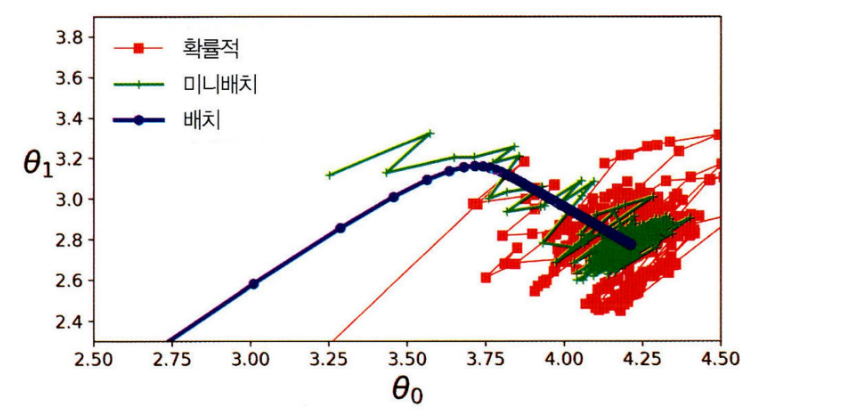

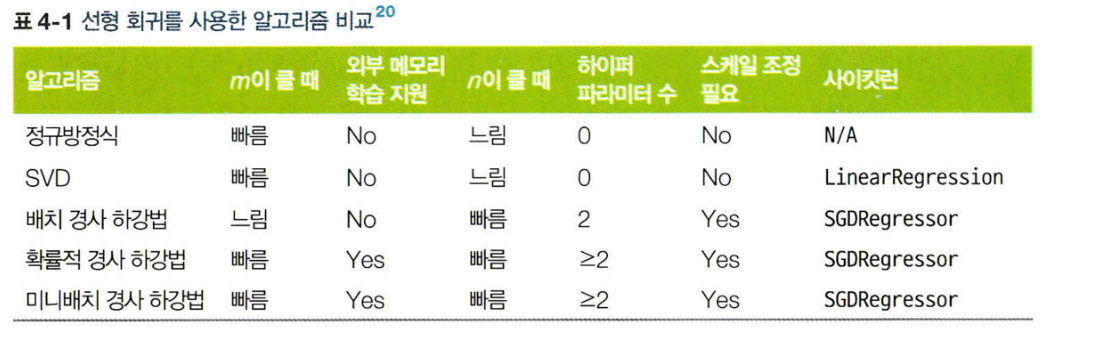

In [ ]:
# 4.2.1

## 경사하강법 알고리즘 간단히 구현
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.91946534],
       [2.97606107]])

In [ ]:
# 4.2.2

## 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta * gradients

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88465791]), array([2.96573946]))

---
### **4.3 다항 회귀**

- 다항 회귀: 각 특성의 거듭제곱을 새로운 특성으로 추가하고 이를 포함한 데이터셋에 선형모델 훈련. 비선형 데이터를 선형 모델로 학습가능
- 사이킷런의 📑PolynomialFeatures로 데이터 변환: 각 특성을 제곱하여 새로운 특성으로 추가
  - 확장 데이터에 선형 회귀 적용
  - 주어진 차수까지 특성 간의 모든 교차항을 추가함(degree=n)
  - 다항회귀로 특성이 여러개일 때 특성 간의 관계를 찾을 수 있음

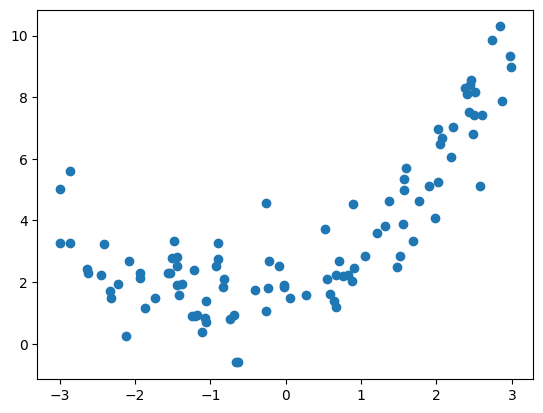

In [9]:
# 4.3

## 비선형 데이터(잡음 포함)
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)
plt.scatter(X,y)

In [10]:
# 각 특성을 제곱하여 새로운 특성으로 추가: X_poly
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.85737333]
[-2.85737333  8.16458233]


In [11]:
# 확장된 데이터에 선형 회귀 적용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.73217025]), array([[0.90857657, 0.55672157]]))

In [12]:
y_predict = lin_reg.intercept_ + X_poly@lin_reg.coef_.T
# y_predict

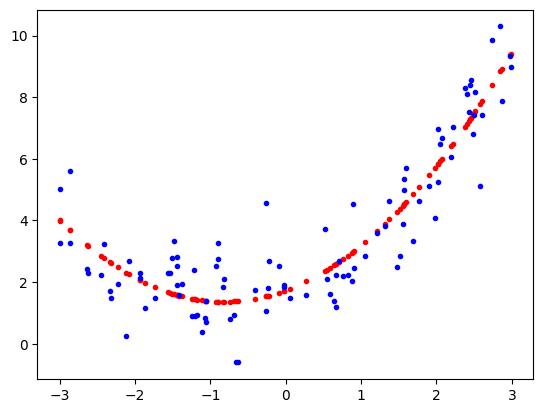

In [13]:
plt.plot(X, y_predict, 'r.')
plt.plot(X ,y, "b.")
plt.show()

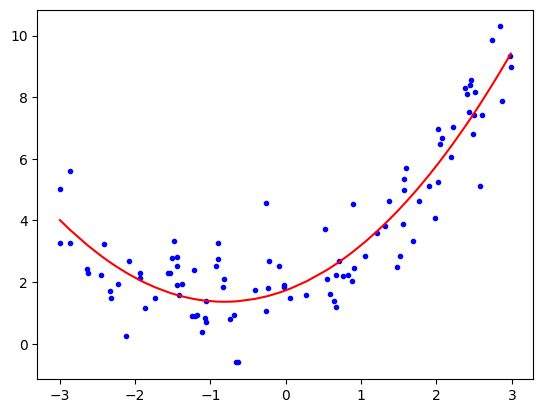

In [14]:
# 곡선 매끄럽게 하려면 X 정렬 후 predict 해야함
X_sorted_idx = np.argsort(X[:, 0])
X_sorted = X[X_sorted_idx]
X_poly_sorted = X_poly[X_sorted_idx]  # X에 맞춰 X_poly도 정렬

y_predict = lin_reg.predict(X_poly_sorted)

plt.plot(X, y, 'b.')
plt.plot(X_sorted, y_predict, 'r-')

### **4.4 학습 곡선**

- 고차 다항회귀는 보통의 선형 회귀(단순, 2차)보다 과대적합 경향 / 선형 모델은 과소적합 -> 2차 다항회귀가 가장 일반화됨
- 일반화 성능 측정 방법
  1. 교차검증 사용. 점수로 과대/소적합 파악 가능
  2. 학습곡선 살펴보기. 모델 성능을 훈련세트 크기의 함수로 나타냄. 크기가 다른 여러 서브 세트를 만들어 여러번 훈련시켜 그래프 생성함
    - 과소적합 모델: 두 곡선이 수평한 구간을 만들고 높은 오차에서 근접해 있음. 훈련 셈플을 더 추가해도 효과가 없음
    > 훈련 세트에 샘플이 추가되어도 훈련세트에 대한 평균오차가 크게 좋아지거나 나빠지지 않음. 검증데이터에 대한 검증 오차는 감소가 완만해지다가 훈련세트 그래프와 가까워짐.
    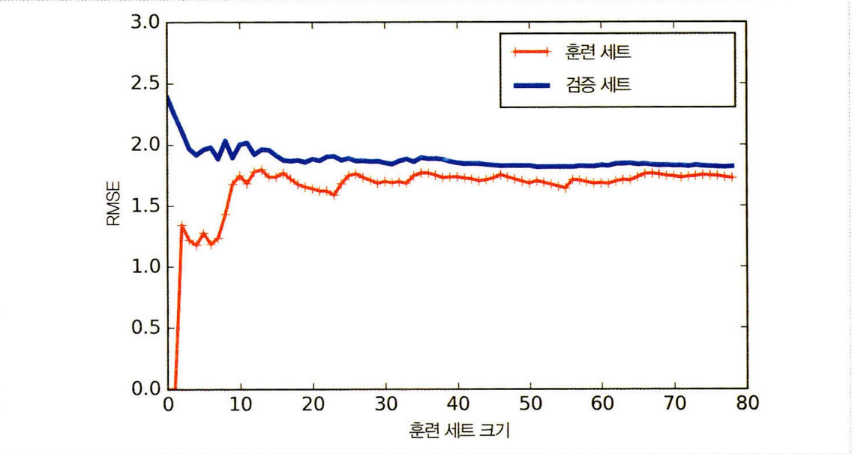

    - 과대적합 모델: 두 곡선 사이에 공간이 있음. 훈련 데이터 성능이 검증 데이터보다 훨씬 나음.
    > 더 큰 훈련 세트를 사용할수록 두 곡선이 점점 가까워짐. 과대적합을 개선하기 위해선 검증오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가해야함
    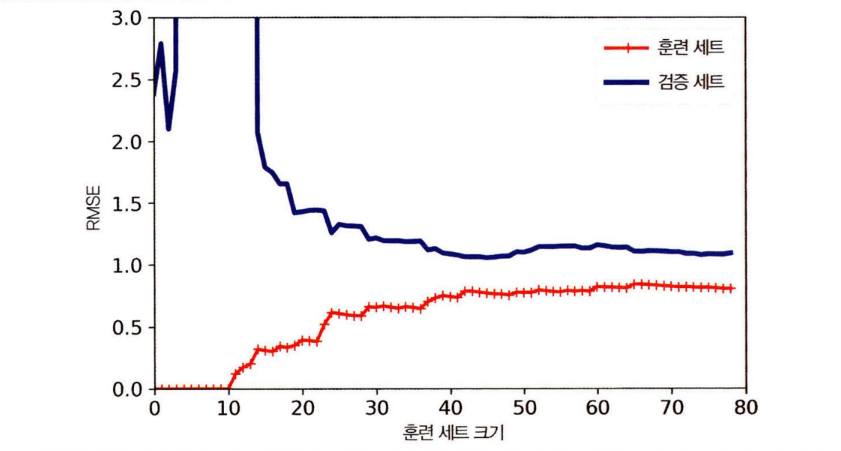

- 편향 / 분산 트레이드오프
  - 편향: 잘못된 가정으로 인한 일반화 오차. 편향이 크면 과소적합 가능성
  - 분산: 작은 변동에 민감한 정도. 분산이 높으면 과대적합 가능성
  - 줄일 수 없는 오차: 데이터 자체 잡음. 잡음을 제거해야 오차를 줄일 수 있음
  - 모델 복잡도 증가 = 분산 증가+편향 감소 / 모델 복잡도 감소 = 분산 감소+편향 증가


In [15]:
# 4.4 학습 곡선

## 학습 곡선 그리는 함수 정의 후 그려보기
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증세트')

- 과소적합 모델

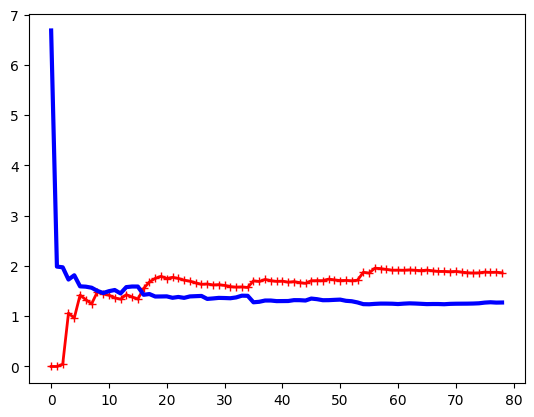

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 과적합 모델

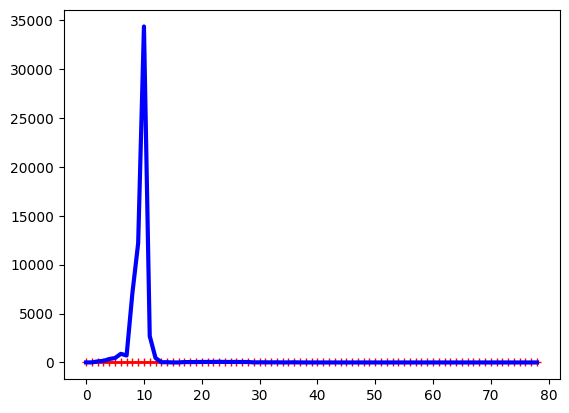

In [17]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)